In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("measurements.csv")
df.rename(columns=lambda x: x.lower(), inplace=True)
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
# Replace commas with periods in the "column_name" column
df['distance'] = df['distance'].str.replace(',', '.', regex=True)
df['consume'] = df['consume'].str.replace(',', '.', regex=True)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.', regex=True)

df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,3.8,45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
col_drop=['specials','refill liters','refill gas']
df=df.drop(col_drop,axis=1)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25,31,SP98,1,0,0
385,16,3.8,45,25,19,SP98,0,0,0
386,15.4,4.6,42,25,31,SP98,1,0,0


In [7]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

In [8]:
mode=df['temp_inside'].mode()
mode

0    21.5
Name: temp_inside, dtype: object

In [9]:
df.temp_inside.fillna(mode[0],inplace=True)

In [10]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   ac            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [12]:


# Convert the "column_name" column to integers
df['temp_inside'] = df['temp_inside'].astype(float)
df['distance'] = df['distance'].astype(float)
df['consume'] = df['consume'].astype(float)


df['temp_diff']= df.temp_inside-df.temp_outside
df['fuel_used']= df.distance* df.consume/100
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


In [13]:
df['cost_of_trip']=np.where(df.gas_type=='E10', df.fuel_used*1.90, df.fuel_used*2.0).round(3)

In [14]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.660
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.958
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.170
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.956
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.582
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.184
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.385
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.216
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.417


In [15]:
df['trip_in_hours']= df.speed/60

In [16]:
df['avg_speed']= df['distance']/ df['trip_in_hours']

In [17]:
df=df.drop(['speed'],axis=1)

In [18]:
df_n= df.select_dtypes(np.number)
df_c=df.select_dtypes(object)

In [19]:
df.to_csv('cobify_clean_data.csv',index=False)

# Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

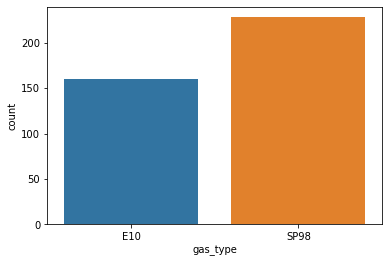

In [22]:
fig,ax=plt.subplots()
sns.countplot(x=df.gas_type)
plt.show

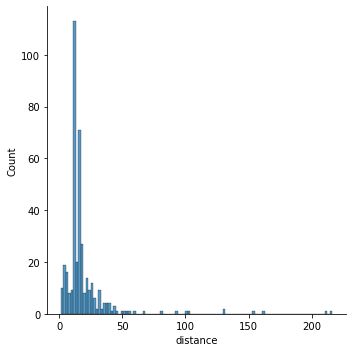

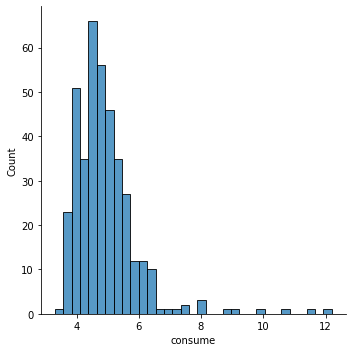

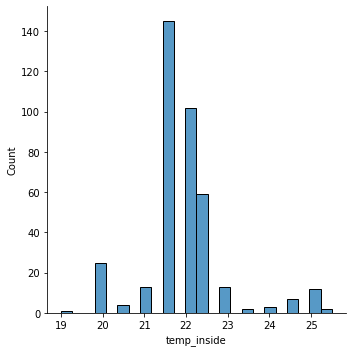

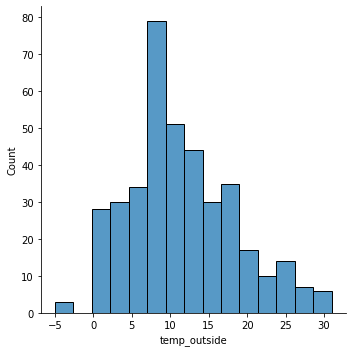

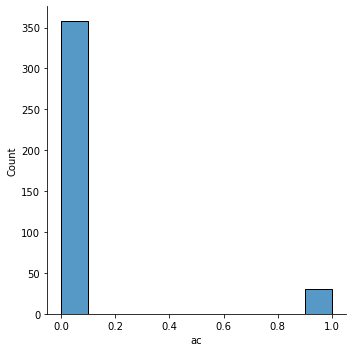

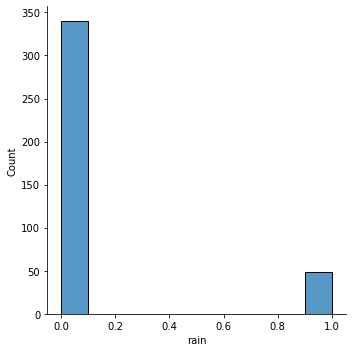

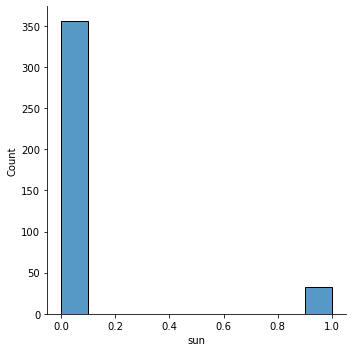

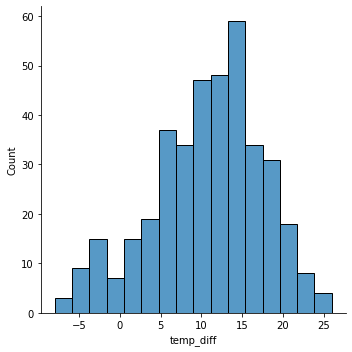

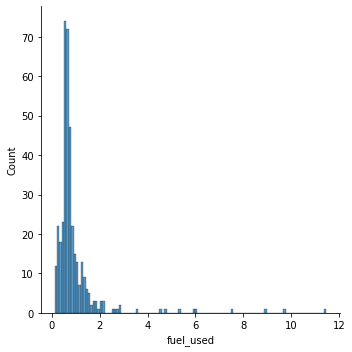

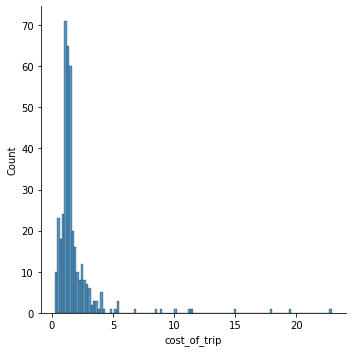

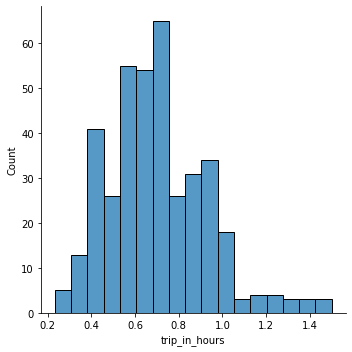

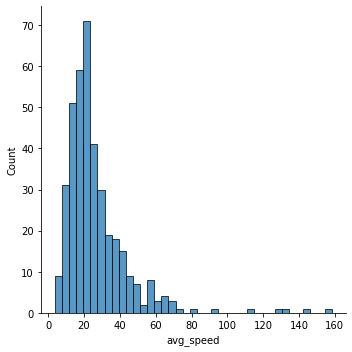

In [23]:
for column in df_n:
    sns.displot(df_n[column])
    plt.show()

In [24]:
display(df['cost_of_trip'].max())

22.907

In [25]:
display(df['cost_of_trip'].min())

0.228